<a href="https://colab.research.google.com/github/NadilaAmaliaaa/PCVK_GANJIL_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama  : Nadila Amalia Pribadi
### Kelas : TI-3F / 19
### NIM   : 2241720114
### Jobsheet 5 Machine Learning
---

In [ ]:
from google.colab import drive
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')

Mounted at /content/drive


## 1. Gamma Correction

Gamma Correction pada citra
----------------------------
Masukkan nilai gamma = 3


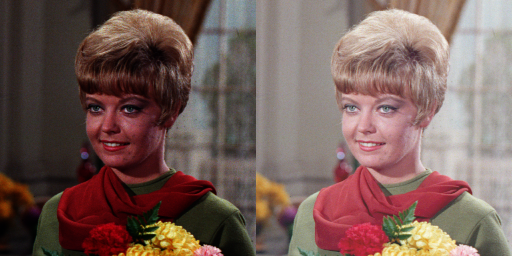

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

print('Gamma Correction pada citra')
print('----------------------------')

try:
    gamma = float(input('Masukkan nilai gamma = '))
except ValueError:
    print('Error, not a number')

# Fungsi untuk menghitung gamma correction
def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    # Membangun lookup table untuk semua kemungkinan nilai intensitas piksel [0-255]
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Menerapkan lookup table untuk gambar menggunakan fungsi cv.LUT
    return cv.LUT(image, table)

if original is not None:
    # Terapkan gamma correction
    corrected_image = gamma_correction(original, gamma)

    # Tampilkan hasil
    final_frame = cv.hconcat((original, corrected_image))
    cv2_imshow(final_frame)
else:
    print("Error: Gagal memuat gambar")



## 2. Image Depth

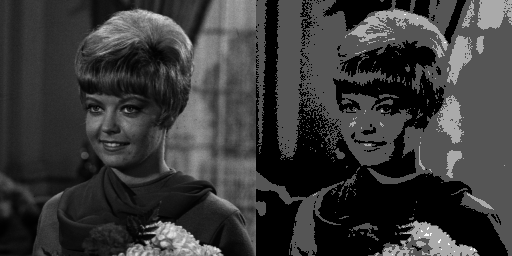

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# Quantize the image based on the new bit depth
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = np.round(original[i, j] / level) * level

# Tampilkan hasil
final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

## 3. Average Denoising

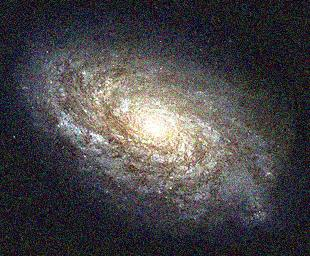

In [ ]:
!pip install glob2
#Import the glob module
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [ ]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 20
Nilai PSNR: 
30.338421817531362


In [ ]:
import glob

image_files = glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg')
cv_img = []

for img in image_files:
    n = cv.imread(img)
    if n is not None:
        cv_img.append(n)
    else:
        print(f"Error: Gagal memuat gambar {img}")

### Jumlah Citra Di Average: 5

Nilai PSNR adalah 29.10735883689299 (dB)


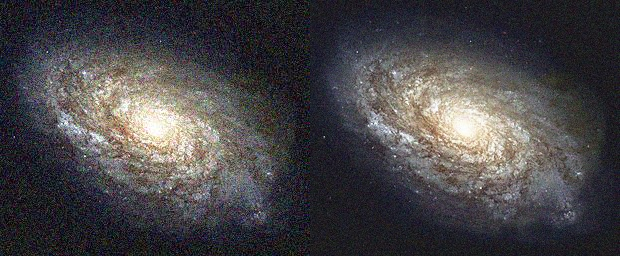

In [ ]:
from math import log10, sqrt
from google.colab.patches import cv2

dst = cv_img[0]
img_amount = 5

for i in range(1,img_amount):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(cv_img[0], compressed)

print('Nilai PSNR adalah', psnr, '(dB)')

# Concatenate original and compressed for comparison
galaxy_frame = cv.hconcat([cv_img[0], dst])
cv2_imshow(galaxy_frame)
cv.waitKey(0)
cv.destroyAllWindows()

### Jumlah Citra Di Average: 10

Nilai PSNR adalah 28.97412792310547 (dB)


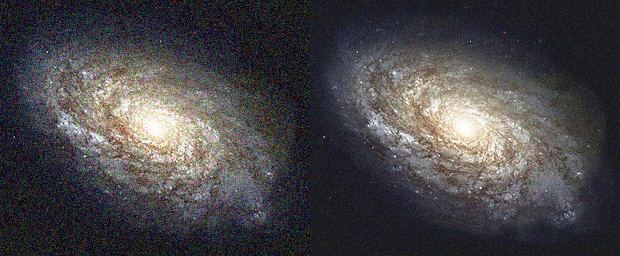

In [ ]:
from math import log10, sqrt
from google.colab.patches import cv2

dst = cv_img[0]
img_amount = 10

for i in range(1,img_amount):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(cv_img[0], compressed)

print('Nilai PSNR adalah', psnr, '(dB)')

# Concatenate original and compressed for comparison
galaxy_frame = cv.hconcat([cv_img[0], dst])
cv2_imshow(galaxy_frame)
cv.waitKey(0)
cv.destroyAllWindows()

### Jumlah Citra Di Average: 20

Nilai PSNR adalah 28.922122481249247 (dB)


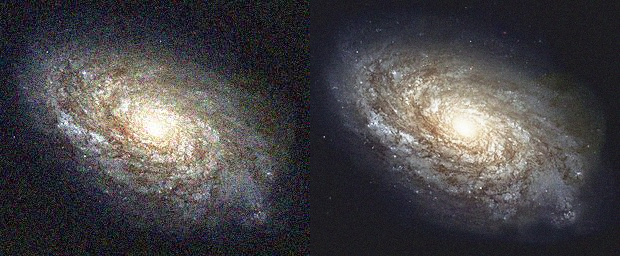

In [ ]:
from math import log10, sqrt
from google.colab.patches import cv2

dst = cv_img[0]
img_amount = 20

for i in range(1,img_amount):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(cv_img[0], compressed)

print('Nilai PSNR adalah', psnr, '(dB)')

# Concatenate original and compressed for comparison
galaxy_frame = cv.hconcat([cv_img[0], dst])
cv2_imshow(galaxy_frame)
cv.waitKey(0)
cv.destroyAllWindows()

### Jumlah Citra Di Average: 40

Nilai PSNR adalah 28.898617026309232 (dB)


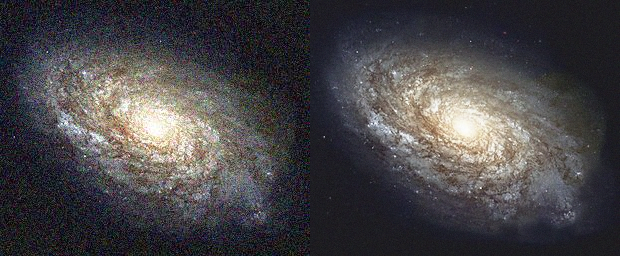

In [ ]:
from math import log10, sqrt
from google.colab.patches import cv2

dst = cv_img[0]
img_amount = 40

for i in range(1,img_amount):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(cv_img[0], compressed)

print('Nilai PSNR adalah', psnr, '(dB)')

# Concatenate original and compressed for comparison
galaxy_frame = cv.hconcat([cv_img[0], dst])
cv2_imshow(galaxy_frame)
cv.waitKey(0)
cv.destroyAllWindows()

### Jumlah Citra Di Average: 80

Nilai PSNR adalah 28.891707534942928 (dB)


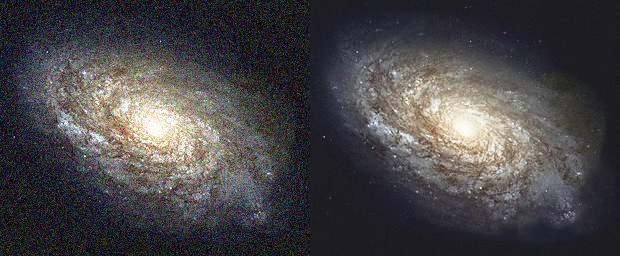

In [ ]:
from math import log10, sqrt
from google.colab.patches import cv2

dst = cv_img[0]
img_amount = 80

for i in range(1,img_amount):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(cv_img[0], compressed)

print('Nilai PSNR adalah', psnr, '(dB)')

# Concatenate original and compressed for comparison
galaxy_frame = cv.hconcat([cv_img[0], dst])
cv2_imshow(galaxy_frame)
cv.waitKey(0)
cv.destroyAllWindows()

### Jumlah Citra Di Average: 100

Nilai PSNR adalah 28.889888294741134 (dB)


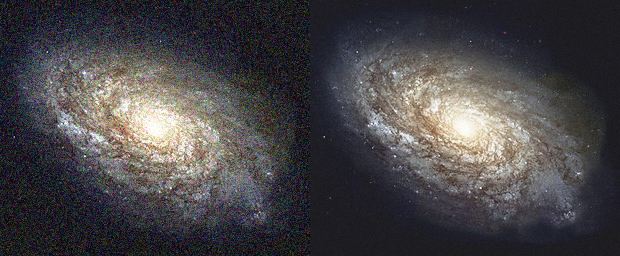

In [ ]:
from math import log10, sqrt
from google.colab.patches import cv2

dst = cv_img[0]
img_amount = 100

for i in range(1,img_amount):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(cv_img[0], compressed)

print('Nilai PSNR adalah', psnr, '(dB)')

# Concatenate original and compressed for comparison
galaxy_frame = cv.hconcat([cv_img[0], dst])
cv2_imshow(galaxy_frame)
cv.waitKey(0)
cv.destroyAllWindows()

### Kesimpulan:

Meskipun secara umum peningkatan jumlah citra averaging dapat meningkatkan nilai PSNR, hubungan ini tidak selalu bersifat linier. Ada batasan di mana peningkatan jumlah citra mungkin tidak memberikan peningkatan signifikan.

## 4. Image Masking

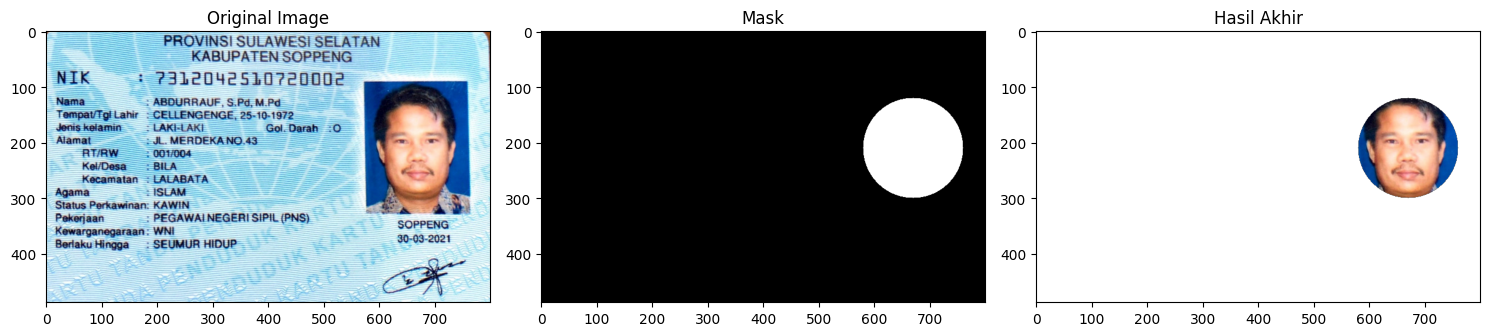

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = ('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img = cv.imread(image_path)

mask = np.zeros(img.shape[:2], dtype="uint8")

cv.circle(mask, (670, 210), 90, 255, -1)

masked = cv.bitwise_and(img, img, mask=mask)

tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

b, g, r = cv.split(masked)

rgba = [b, g, r, alpha]

result = cv.merge(rgba)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()


### Masking Kelompok 1

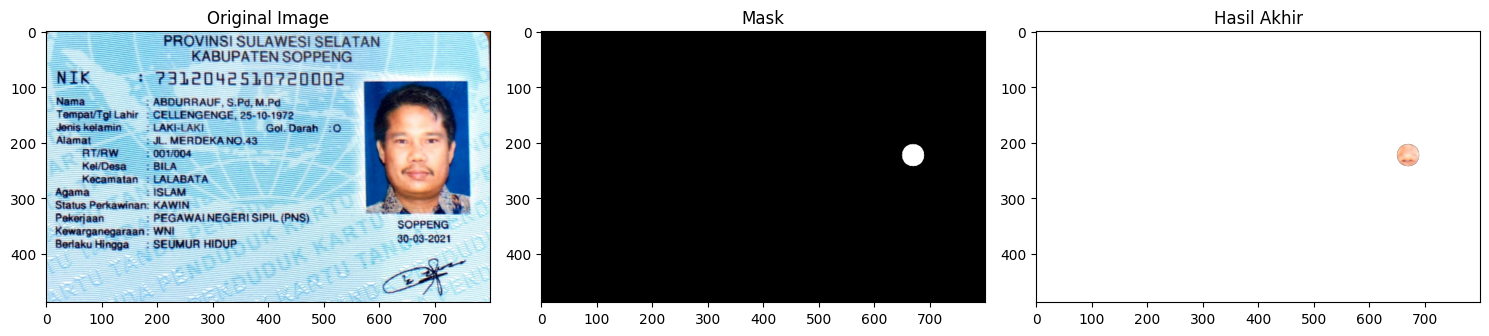

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = ('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img = cv.imread(image_path)

mask = np.zeros(img.shape[:2], dtype="uint8")

cv.circle(mask, (670, 223), 20, 255, -1)

masked = cv.bitwise_and(img, img, mask=mask)

tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

b, g, r = cv.split(masked)

rgba = [b, g, r, alpha]

result = cv.merge(rgba)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()


### Lakukan percobaan menggunakan operator lain

#### NOT

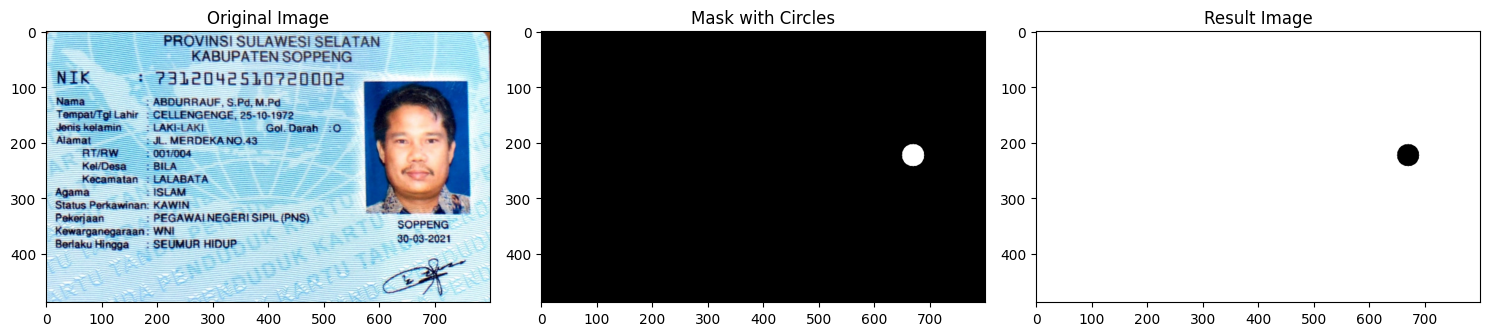

In [ ]:
mask = np.zeros(img.shape[:2], dtype="uint8")

center_coordinates = (670, 223)
radius1 = 20
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates, radius1, color, thickness)

result = ~mask

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

#### OR

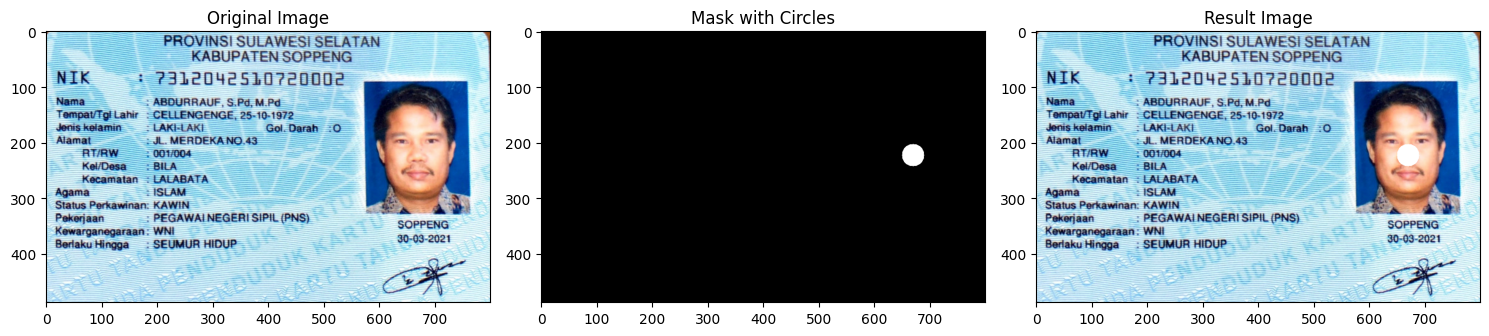

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates = (670, 223)
radius1 = 20
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates, radius1, color, thickness)

result = img | mask

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

#### AND

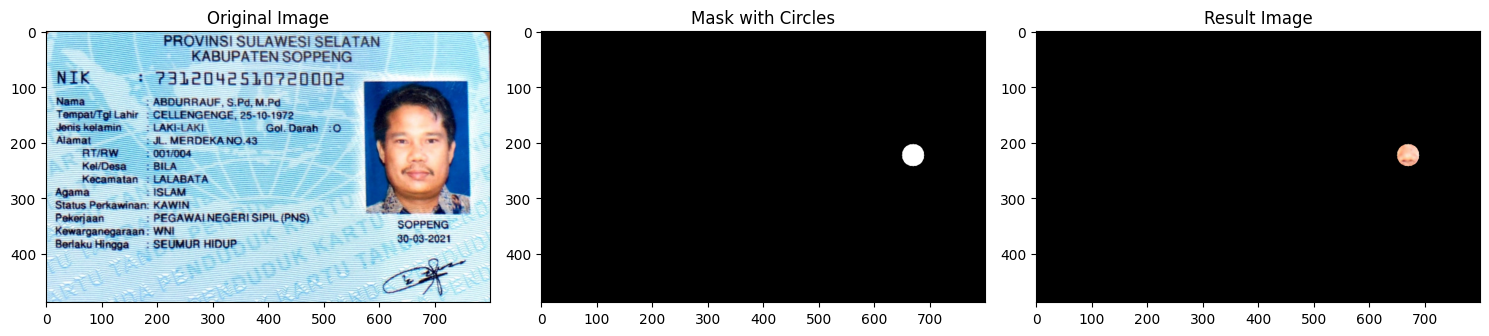

In [ ]:
mask = np.zeros_like(img)

center_coordinates = (670, 223)
radius1 = 20
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates, radius1, color, thickness)

result = img & mask

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

#### NAND

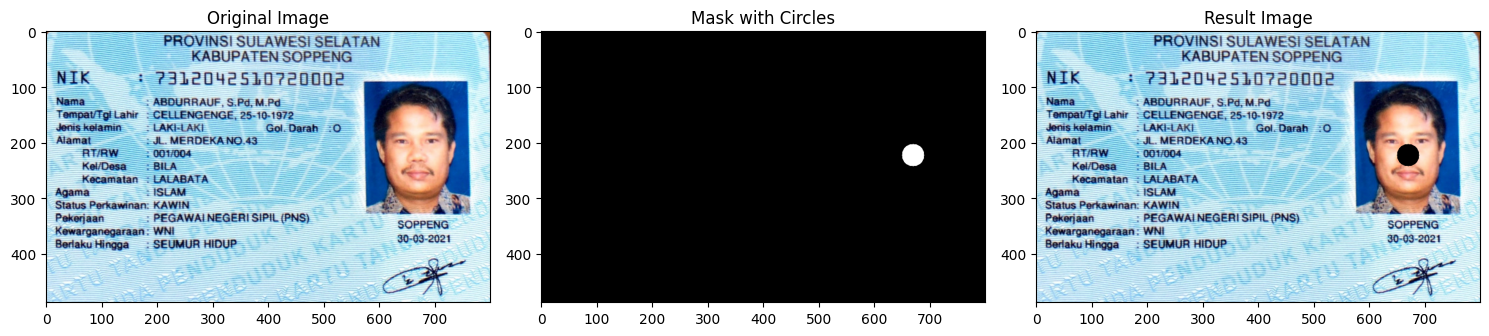

In [ ]:
mask = np.zeros_like(img)

center_coordinates = (670, 223)
radius1 = 20
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates, radius1, color, thickness)

result = img & ~mask

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

#### XOR

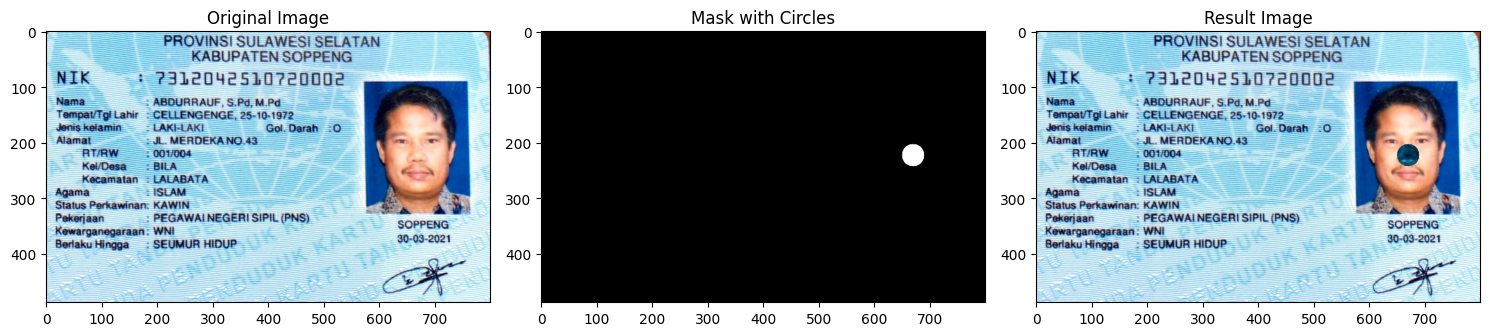

In [ ]:
mask = np.zeros_like(img)

center_coordinates = (670, 223)
radius1 = 20
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates, radius1, color, thickness)

result = img ^ mask

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()


### Kesimpulan:

- NOT (Negation): Penerapan pada Citra Biner: Menerapkan operasi NOT pada citra biner akan menghasilkan citra baru yang membalik setiap piksel dalam citra tersebut. Piksel yang bernilai 1 akan diubah menjadi 0, dan piksel yang bernilai 0 akan diubah menjadi 1.
- AND (Conjunction): Penerapan pada Citra Biner: Menerapkan AND pada dua citra biner menghasilkan citra baru yang hanya mempertahankan piksel yang ada di kedua citra sumber.
- OR (Disjunction): Penerapan pada Citra Biner: Menerapkan OR pada dua citra biner menghasilkan citra baru yang mempertahankan piksel dari setidaknya satu citra sumber.
- XOR (Exclusive OR): Penerapan pada Citra Biner: Menerapkan XOR pada dua citra biner menghasilkan citra baru yang mempertahankan piksel yang hanya muncul di salah satu citra sumber, tetapi bukan keduanya.
- NAND (NOT AND): Penerapan pada Citra Biner: Menerapkan NAND pada dua citra biner menghasilkan citra baru yang mempertahankan piksel yang tidak ada di kedua citra sumber.